In [4]:
!pip install tensorflow

In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [6]:
BATCH_SIZE = 32
IMAGE_SIZE = 256

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

In [10]:
#however since we had decided batch size as 32 so
68*32

2176

In [11]:
CHANNELS=3
EPOCHS=50

In [12]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 2 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 2 1 0 1 1]


In [13]:
#In the above cell, 3 represents RGB value also known as channel, 256*256 is the size of each image and 0 represents Potato Early Blight, 1 represents Potato Late Blight, 2 represents Potato Healthy
#take 1 means take the first batch into consideration.

In [14]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0])
    #It prints in tensor since we had originally took dataset in tensorflow so to convert it as numpy we do

tf.Tensor(
[[[161. 151. 159.]
  [160. 150. 158.]
  [159. 149. 157.]
  ...
  [143. 132. 138.]
  [147. 136. 142.]
  [135. 124. 130.]]

 [[160. 150. 158.]
  [160. 150. 158.]
  [161. 151. 159.]
  ...
  [130. 119. 125.]
  [130. 119. 125.]
  [147. 136. 142.]]

 [[161. 151. 159.]
  [162. 152. 160.]
  [164. 154. 162.]
  ...
  [125. 114. 120.]
  [131. 120. 126.]
  [143. 132. 138.]]

 ...

 [[194. 185. 188.]
  [191. 182. 185.]
  [190. 181. 184.]
  ...
  [139. 127. 127.]
  [142. 130. 130.]
  [158. 146. 146.]]

 [[193. 184. 187.]
  [190. 181. 184.]
  [187. 178. 181.]
  ...
  [139. 127. 127.]
  [148. 136. 136.]
  [167. 155. 155.]]

 [[189. 180. 183.]
  [185. 176. 179.]
  [181. 172. 175.]
  ...
  [133. 121. 121.]
  [149. 137. 137.]
  [160. 148. 148.]]], shape=(256, 256, 3), dtype=float32)


In [15]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[110. 101. 104.]
  [127. 118. 121.]
  [140. 131. 134.]
  ...
  [166. 155. 149.]
  [173. 158. 153.]
  [177. 162. 155.]]

 [[130. 121. 124.]
  [141. 132. 135.]
  [119. 110. 113.]
  ...
  [164. 151. 143.]
  [165. 151. 142.]
  [165. 151. 142.]]

 [[131. 122. 125.]
  [134. 125. 128.]
  [141. 132. 135.]
  ...
  [168. 156. 140.]
  [169. 156. 140.]
  [171. 155. 140.]]

 ...

 [[126. 119. 126.]
  [135. 128. 135.]
  [136. 129. 136.]
  ...
  [180. 175. 181.]
  [180. 175. 181.]
  [179. 174. 180.]]

 [[111. 104. 111.]
  [165. 158. 165.]
  [128. 121. 128.]
  ...
  [180. 175. 181.]
  [181. 176. 182.]
  [183. 178. 184.]]

 [[136. 129. 136.]
  [141. 134. 141.]
  [151. 144. 151.]
  ...
  [180. 175. 181.]
  [182. 177. 183.]
  [185. 180. 186.]]]


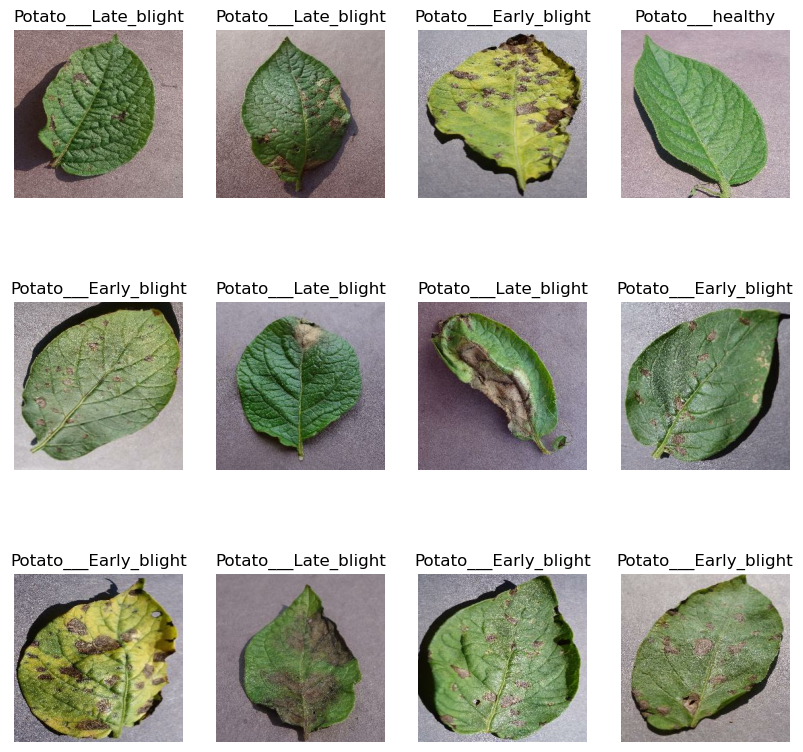

In [16]:
#Visualizing image data
#unsigned integer data bit (uint8, ranging 0 to 255). For images you always want the unsigned kind.
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        #subplot first is 3 rows, second attribute is 4 columns, i+1 is used as i starts from 0 and used for increment
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
        #axis off is used to hide the axis

In [17]:
#80% is training data
#10% validation
#10% test data
#On every epoch, we test the validation data then followed by testing

In [18]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [19]:
train_ds=dataset.take(54)
len(train_ds)

54

In [20]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [21]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [22]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [23]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [24]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [25]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [26]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [27]:
len(train_ds)

54

In [28]:

len(val_ds)

6

In [29]:

len(test_ds)

8

In [30]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
#This line of code is used to optimize the performance of your TensorFlow dataset (train_ds), and it does three things:

#Caching (cache()): This keeps the dataset in memory after it’s loaded off disk during the first epoch. This ensures the dataset does not have to be reloaded each time it is used, thereby speeding up subsequent epochs.
#Shuffling (shuffle(1000)): This randomly shuffles the items in the dataset. 1000 here denotes the shuffle buffer size, which is the number of elements from the dataset should be loaded before shuffling. A larger buffer size provides better randomization, but uses more memory.
#Prefetching (prefetch(buffer_size=tf.data.AUTOTUNE)): This overlaps the preprocessing and model execution of a training step. While the model is executing training step s, the input pipeline is reading the data for step s+1. The argument tf.data.AUTOTUNE allows the tf.data runtime to tune the value dynamically at runtime.


In [32]:
#Creating a Layer for Resizing and Normalization
#Before we feed our images to network, we should be resizing it to the desired size. 
#Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). 
#This should happen while training as well as inference. 
#Hence we can add that as a layer in our Sequential Model.

#You might be thinking why do we need to resize (256,256) image to again (256,256). 
#You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. 
#At that time somone can supply an image that is not (256,256) and this layer will resize it

In [33]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [34]:
#Data Augmentation
#Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [35]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [36]:
#Applying Data Augmentation to Train Dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
# train_ds is likely a TensorFlow dataset object representing your training data. This dataset contains pairs of input data (x) and corresponding target labels (y).

# The .map() function is used to apply a transformation to each element of the dataset. In this case, a lambda function is used as the transformation. Lambda functions are anonymous functions defined inline.

# Inside the lambda function, data_augmentation() is called on the input data (x). This function likely performs various transformations or augmentations on the input data to increase the diversity of the training dataset. Data augmentation is commonly used in deep learning to improve model generalization and robustness by creating variations of the training data (e.g., rotating images, adding noise, etc.).

# The training=True argument is passed to data_augmentation() to indicate that the augmentations should be applied because the model is currently being trained. This might trigger different behavior within the data_augmentation() function depending on whether the model is training or not. For example, certain augmentations like dropout or random transformations might only be applied during training.

# The transformed input data (x) and the original target labels (y) are returned as a tuple (x, y).

# .prefetch(buffer_size=tf.data.AUTOTUNE) is chained to the .map() function call. This prefetches elements from the dataset in the background while the model is training, improving data pipeline performance. The buffer_size parameter determines how many elements to prefetch. Using tf.data.AUTOTUNE allows TensorFlow to dynamically adjust the prefetch buffer size based on available system resources to optimize performance.

# In summary, the provided code applies data augmentation to the training dataset using a lambda function, with transformations defined in the data_augmentation() function. It then prefetches the augmented data to improve training performance.

In [38]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
# # input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS): This line defines the shape of the input data. 
# BATCH_SIZE is the number of samples processed before the model is updated, 
# IMAGE_SIZE is the height and width of the input images, 
# CHANNELS refers to the number of color channels (e.g., 3 for RGB images).
# # n_classes = 3: This line defines the number of output classes.
# # In this case, the model will be able to classify input images into one of three categories.
# # resize_and_rescale: This is a preprocessing layer that resizes and rescales images. It’s not defined in the provided code, but it’s typically used to ensure all input images have the same dimensions and pixel values are scaled to a certain range.
# # layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape): This line adds a 2D convolution layer to the model. The layer will have 32 output filters, each with a size of 3x3. The activation function is ReLU (Rectified Linear Unit). The input_shape argument is only needed for the first layer to inform the model about the shape of the input data.
# # layers.MaxPooling2D((2, 2)): This line adds a max pooling layer to the model. Max pooling is a downsampling strategy that reduces the spatial dimensions (width, height) of the input volume. This is done to reduce the amount of parameters and computation in the network, and hence to also control overfitting. The (2,2) indicates halving the input in both spatial dimension.
# # The previous two steps are repeated multiple times to add more convolutional and max pooling layers to the model. Each convolutional layer has more filters than the previous one, which is a common practice in CNNs as it allows the network to learn more complex features.
# # layers.Flatten(): This line adds a flatten layer, which converts the 2D matrix data to a 1D vector. This is needed because fully connected layers (like the next dense layer) expect input to be in the form of a 1D array.
# # layers.Dense(64, activation='relu'): This line adds a fully connected layer (also known as a dense layer) to the model. This layer has 64 neurons and uses the ReLU activation function.
# # layers.Dense(n_classes, activation='softmax'): This is the output layer of the model. It has n_classes neurons (one for each class) and uses the softmax activation function to output a probability distribution over the classes. This means the model will output the probability of the input image belonging to each class.
# # model.build(input_shape=input_shape): This line builds the model. It’s needed because some layers in Keras (like Dense) require the input shape to be specified ahead of time, and this line ensures that all layers have been properly built

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [41]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50


54/54 [==============================] - 173s 3s/step - loss: 0.9231 - accuracy: 0.4635 - val_loss: 0.9030 - val_accuracy: 0.4688
Epoch 2/50
54/54 [==============================] - 122s 2s/step - loss: 0.7497 - accuracy: 0.6331 - val_loss: 0.6878 - val_accuracy: 0.7083
Epoch 3/50
54/54 [==============================] - 98s 2s/step - loss: 0.5542 - accuracy: 0.7720 - val_loss: 0.5863 - val_accuracy: 0.7448
Epoch 4/50
54/54 [==============================] - 102s 2s/step - loss: 0.4779 - accuracy: 0.8027 - val_loss: 0.4617 - val_accuracy: 0.7552
Epoch 5/50
54/54 [==============================] - 99s 2s/step - loss: 0.3439 - accuracy: 0.8547 - val_loss: 0.5477 - val_accuracy: 0.7500
Epoch 6/50
54/54 [==============================] - 100s 2s/step - loss: 0.2683 - accuracy: 0.8981 - val_loss: 0.5638 - val_accuracy: 0.7865
Epoch 7/50
54/54 [==============================] - 101s 2s/step - loss: 0.1970 - accuracy: 0.9213 - val_loss: 0.2838 - val_accuracy: 0.8958
Epoch 8/50
54

In [44]:
scores=model.evaluate(test_ds)
scores

8/8 [==============================] - 3s 434ms/step - loss: 0.2412 - accuracy: 0.9414


[0.24121804535388947, 0.94140625]

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

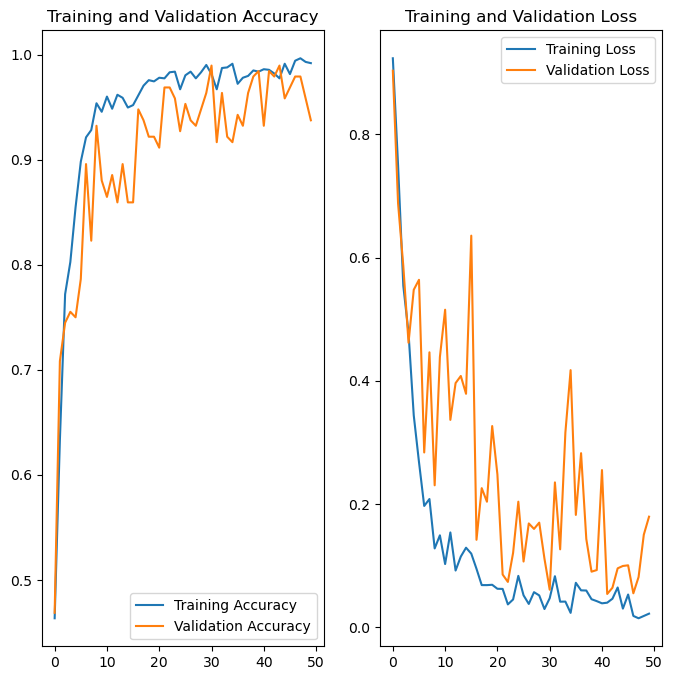

In [49]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 12s 12s/step
predicted label: Potato___Late_blight


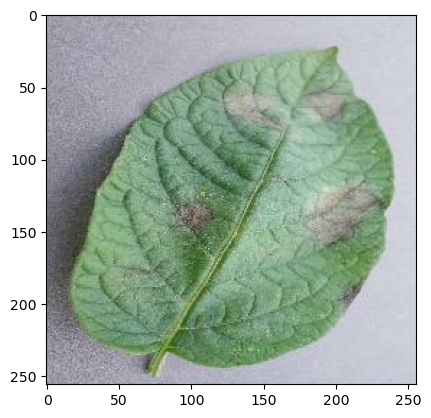

In [50]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 148ms/step


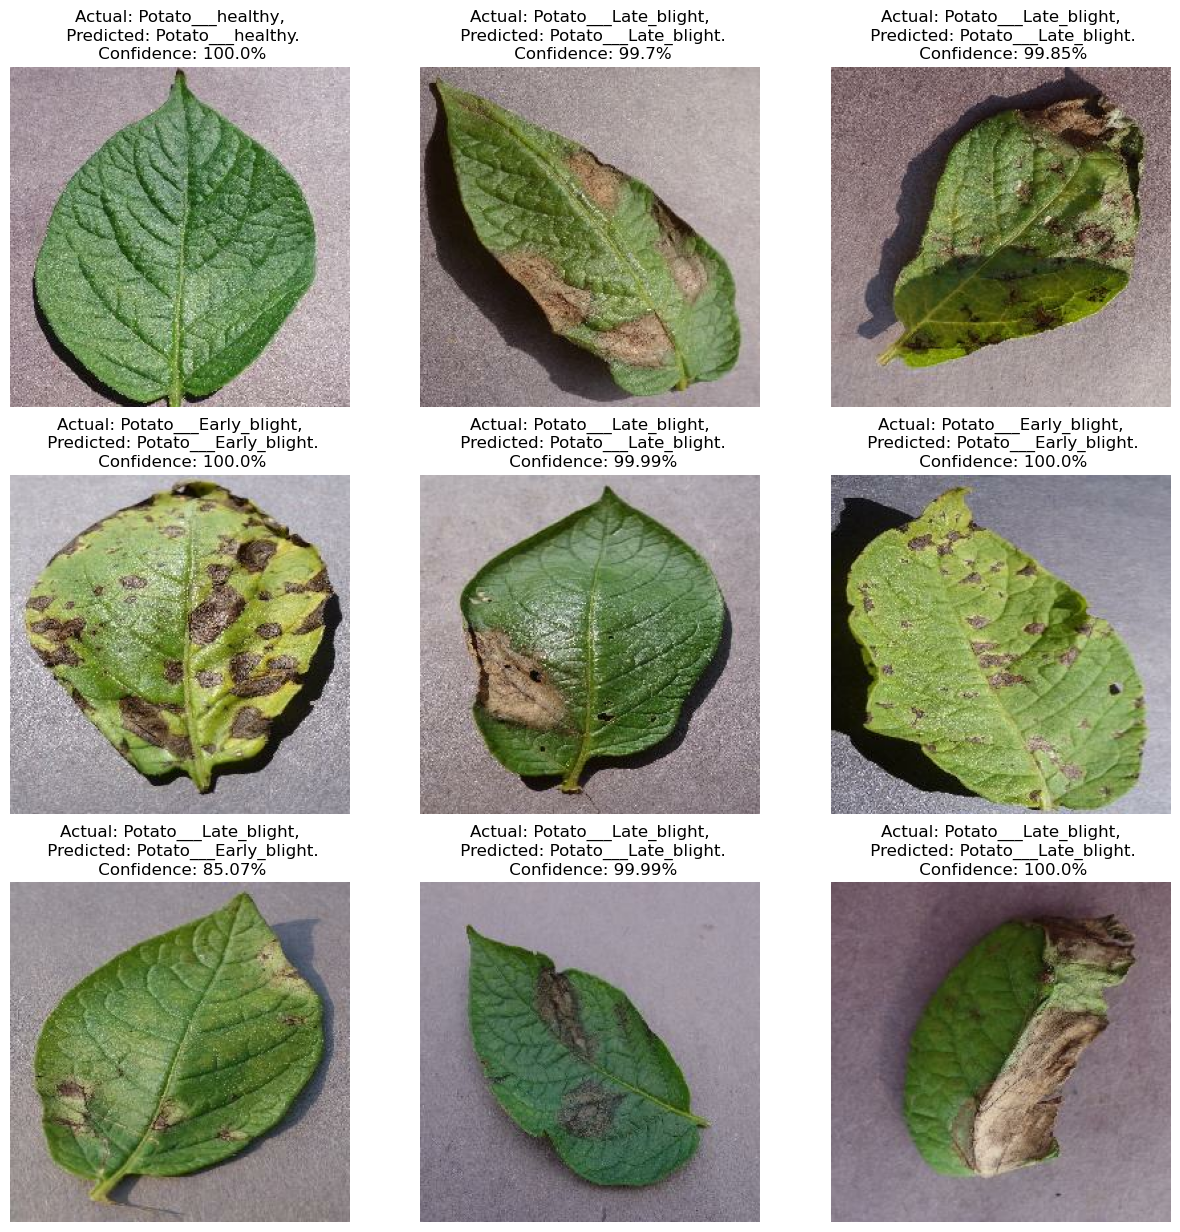

In [52]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [61]:
import os
model.save(f"C:/Users/LENOVO/Documents/Bhavvya/")

INFO:tensorflow:Assets written to: C:/Users/LENOVO/Documents/Bhavvya/assets


INFO:tensorflow:Assets written to: C:/Users/LENOVO/Documents/Bhavvya/assets


In [62]:
model.save("../potatoes.h5")

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
